In [46]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [47]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [48]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [49]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [50]:
#Create an instance of StandardScaler
scaler = StandardScaler()

#Apply the scaler to the data (the DataFrame values are converted to a NumPy array)
normalized_data = scaler.fit_transform(df_market_data)

# Save normalized data back into a new DataFrame 
normalized_df = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first few rows of the normalized data
print(normalized_df.head(5))


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using Using the Scaled DataFrame

In [51]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

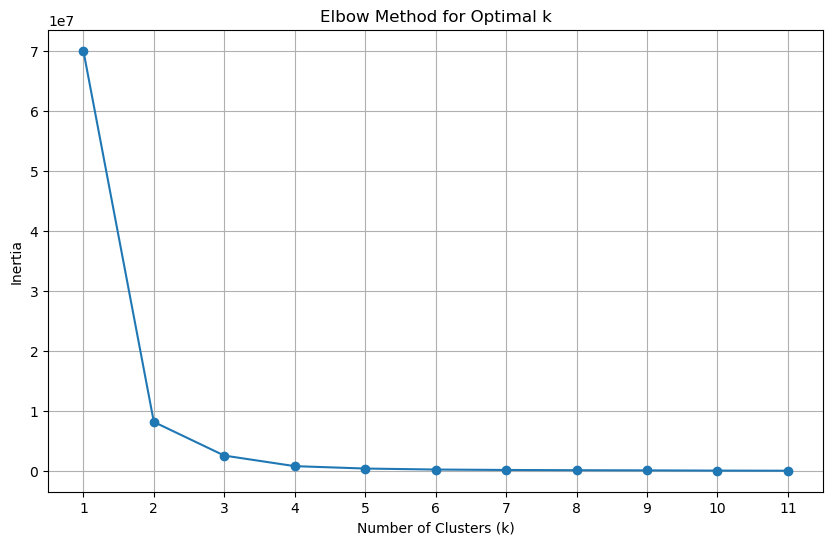

In [52]:
#empty list to store the inertia values:
inertia = []

#Create a for loop to compute the inertia with each possible value of ( k ):
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_market_data)
    inertia.append(kmeans.inertia_)

#Create a dictionary with the data to plot the elbow curve:
elbow_data = {
    'k': k_values,
    'inertia': inertia
}
#Plot a line chart with all the inertia values computed with the different values of ( k ):

plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for K is 3.

---

### Cluster Cryptocurrencies with K-means Using the Scaled DataFrame

In [36]:
# Suppress warnings
warnings.filterwarnings('ignore')

#Initialize the K-means model with the best value for k (assuming it's 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the K-means model using the scaled DataFrame
kmeans.fit(scaled_data)

# Predict the clusters
clusters = kmeans.predict(scaled_data)

# Create a copy of the scaled DataFrame and add the predicted clusters
scaled_df = pd.DataFrame(scaled_data, index=df_market_data.index, columns=df_market_data.columns)
scaled_df['Cluster'] = clusters

# Create a scatter plot using hvPlot
scatter_plot = scaled_df.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='Cluster', 
    hover_cols=['Cluster'],  
    title='K-means Clustering of Cryptocurrencies',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimise Clusters with Principal Component Analysis.

In [37]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Step 3: Perform PCA to reduce to three principal components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Step 4: Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Total explained variance of the three principal components
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance of the three principal components: {total_explained_variance:.4f}")

# Step 5: Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, index=df_market_data.index, columns=[f'PC{i+1}' for i in range(3)])

# Display the first five rows of the scaled PCA DataFrame
print(pca_df.head())


Total Explained Variance of the three principal components: 0.8950
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


What is the total explained variance of the three principal components? The total explained variance of the three principal components is 0.8950 or 89.50%. This means that these three principal components together capture 89.50% of the total variance in the original dataset. This high percentage indicates that the components are effective in representing the variability of the data.

### Find the Best Value for k Using the Scaled PCA DataFrame

In [39]:

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)  # Initialize KMeans model
    kmeans.fit(pca_df)  # Fit the model on the PCA DataFrame
    inertia_values.append(kmeans.inertia_)  # Append the inertia value to the list

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame from the dictionary and plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow curve
elbow_curve = elbow_df.hvplot.line(
    x='k',          
    y='inertia',      
    title='Elbow Curve for Optimal k Value',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400
)

# Display the plot
elbow_curve


:Curve   [k]   (inertia)

#### Answer the following question: 

What is the best value for k when using the scaled PCA DataFrame?
The best value for 𝑘 is 5.

Does it differ from the best k value found using the original scaled DataFrame?
Yes, it differs. The best 𝑘 value from the original scaled DataFrame was 3.


#### Cluster Cryptocurrencies with K-means Using the PCA DataFrame : 



In [40]:
# Initialize the K-means model with the best value for k
best_k = 5  # Based on your previous findings
kmeans = KMeans(n_clusters=best_k, random_state=0)

#  Fit the K-means model using the scaled PCA DataFrame
kmeans.fit(pca_df)

#  Predict the clusters to group the cryptocurrencies
predicted_clusters = kmeans.predict(pca_df)

#  Create a copy of the scaled PCA DataFrame and add a new column for the predicted clusters
pca_clustered_df = pca_df.copy()
pca_clustered_df['Cluster'] = predicted_clusters

#  Create a scatter plot using hvPlot
scatter_plot = pca_clustered_df.hvplot.scatter(
    x='PC1',                # X-axis
    y='PC2',                # Y-axis
    by='Cluster',           # Color by cluster labels
    hover_cols=['coin_id'], # Show coin_id in hover
    title='K-means Clustering of Cryptocurrencies',
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot



:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

---

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [43]:
# Create a composite plot
composite_plot = elbow_original_plot + elbow_pca_plot

# Display the composite plot
composite_plot.opts(legend_position='top_left', title='Elbow Curve Comparison')

:Layout
   .Curve.Original_Data :Curve   [k]   (Inertia)
   .Curve.PCA_Data      :Curve   [k]   (Inertia)

In [45]:
# Create a composite plot
composite_plot = scatter_original + scatter_pca

# Display the composite plot
composite_plot.opts(title='Comparison of Cryptocurrency Clusters')

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
Reducing the number of dimensions makes it easier to visualiase and interpret the clusers. When using PCA to reduce the data to two or three dimension it simplifies the ability to interpret the relationships between the data points and the characteristics of each cluster. By using fewer features, there is less "noise" included in the visual informaton and therefore more distinct and meaningful clusters can be seen and analysed, improving the  the quality of the insights derived. Using less dimensions also meanst that there are less data points to find that tend to look like outliers, allowing the algorithm to perform better and find more meaningful clusters. Using fewer features does improve the peformance of the computations undertaken by the algorithm which cn be useful when working with large data sets. 
